# Exploratory Data Analysis (EDA) - DELA
***

## 1. Introduction


## 1.1 About
This document is going to look into the data provided by DELA. This project is going to be conducted within the field of education meaning that the data provided is either publicly available or previously disclosed.

## 1.2 Goal  
The goal of this document is to conduct an Exploratory Data Analysis (__EDA__) that will give a general overview of the data provided and all the opportunities that come with it.
***

## 2. Preparations

### 2.1 Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import calendar

### 2.2 Loading the Data

In [2]:
df = pd.read_csv('data.csv', sep = ';', encoding = 'utf-8')

Firstly, a quick glimpse of the data provides a basic understanding of the amount of entries and data types inside the source.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25408 entries, 0 to 25407
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   omschrijving  25408 non-null  object
 1   mld_dat       25408 non-null  object
 2   Aantal        25408 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 595.6+ KB


A general look of the information provided:

In [4]:
df

,omschrijving,mld_dat,Aantal
0,Arnhem,31/12/2020,4
1,Breda,31/12/2020,5
2,Den Bosch,31/12/2020,8
3,Eindhoven,31/12/2020,9
4,Haaglanden,31/12/2020,5
...,...,...,...
25403,Tilburg,02/01/2017,6
25404,Twente/Achterhoek,02/01/2017,4
25405,Veluwe/Flevoland,02/01/2017,3
25406,West Brabant/Zeeland,02/01/2017,6


The data consists of 25408 rows divided into 3 columns. This concludes the loading of the data as it now ready for further investigation.

### 2.3 Exploring the data

The first logical thing is to check for null values.

In [5]:
df.isnull().sum()

omschrijving    0
mld_dat         0
Aantal          0
dtype: int64

It was concluded that no null values are recorded. The next logical step is to check for duplicate data.

In [6]:
df.duplicated().sum()


0

It was also concluded that the data has no duplicate entries which allows for safely diving deeper into the research. But in order to do that, as the team is international, a translation of the columns in English is required.

In [7]:
df.columns = ['region', 'date', 'amount']

The next step is to transform the date into a proper date time object.

In [8]:
df['date'] = pd.to_datetime(df.date)

In [9]:
df.head(10)

,region,date,amount
0,Arnhem,2020-12-31,4
1,Breda,2020-12-31,5
2,Den Bosch,2020-12-31,8
3,Eindhoven,2020-12-31,9
4,Haaglanden,2020-12-31,5
5,Kempenland,2020-12-31,5
6,Midden Limburg,2020-12-31,7
7,Midden Nederland,2020-12-31,7
8,Nijmegen,2020-12-31,6
9,NOORD,2020-12-31,4


Now that the date is in the proper format, it can be seen what timespan is.

In [10]:
print("Max = ", df["date"].max(), "Min = ", df["date"].min())

Max =  2020-12-31 00:00:00 Min =  2017-01-02 00:00:00


What is observed is that the data spans from 2017-01-02 until the end of year 2020 (2020-12-31).

Next new columns for each year, month, day and weekday are created.

In [11]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['wkday'] = df['date'].dt.strftime("%A")

That is going to allow for further elaborate data visualization possibilities later on.

In [12]:
df

,region,date,amount,year,month,day,wkday
0,Arnhem,2020-12-31,4,2020,12,31,Thursday
1,Breda,2020-12-31,5,2020,12,31,Thursday
2,Den Bosch,2020-12-31,8,2020,12,31,Thursday
3,Eindhoven,2020-12-31,9,2020,12,31,Thursday
4,Haaglanden,2020-12-31,5,2020,12,31,Thursday
...,...,...,...,...,...,...,...
25403,Tilburg,2017-02-01,6,2017,2,1,Wednesday
25404,Twente/Achterhoek,2017-02-01,4,2017,2,1,Wednesday
25405,Veluwe/Flevoland,2017-02-01,3,2017,2,1,Wednesday
25406,West Brabant/Zeeland,2017-02-01,6,2017,2,1,Wednesday


It was noticed that there was some extra whitespace following the region, so that is quickly removed.

In [13]:
df['region'] = df['region'].str.strip()

Finally, a look into the modified data. This allows for seeing current trends, unique values, null fields, as well as the quartile ranges and their respective measurements.

In [14]:
df.describe(include="all", datetime_is_numeric=True)

,region,date,amount,year,month,day,wkday
count,25408,25408,25408.00000,25408.000000,25408.000000,25408.000000,25408
unique,20,NaN,NaN,NaN,NaN,NaN,7
top,Ondernemersgebied,NaN,NaN,NaN,NaN,NaN,Wednesday
freq,1460,NaN,NaN,NaN,NaN,NaN,3645
mean,NaN,2019-01-09 00:09:10.881612032,4.51106,2018.522749,6.524638,15.749764,NaN
min,NaN,2017-01-02 00:00:00,1.00000,2017.000000,1.000000,1.000000,NaN
25%,NaN,2018-01-14 00:00:00,3.00000,2018.000000,4.000000,8.000000,NaN
50%,NaN,2019-01-11 00:00:00,4.00000,2019.000000,7.000000,16.000000,NaN
75%,NaN,2020-01-09 00:00:00,6.00000,2020.000000,10.000000,23.000000,NaN
max,NaN,2020-12-31 00:00:00,25.00000,2020.000000,12.000000,31.000000,NaN


***

## 3. Analyzing Relations

### 3.1 Analysis of relations between the date and the amount of deaths

The first grouping is sum of the amount of deaths per year, month and day respectively.

In [22]:
df_grouped_by_date = df.groupby('date', as_index = False).sum()

In [23]:
df

,region,date,amount,year,month,day,wkday
0,Arnhem,2020-12-31,4,2020,12,31,Thursday
1,Breda,2020-12-31,5,2020,12,31,Thursday
2,Den Bosch,2020-12-31,8,2020,12,31,Thursday
3,Eindhoven,2020-12-31,9,2020,12,31,Thursday
4,Haaglanden,2020-12-31,5,2020,12,31,Thursday
...,...,...,...,...,...,...,...
25403,Tilburg,2017-02-01,6,2017,2,1,Wednesday
25404,Twente/Achterhoek,2017-02-01,4,2017,2,1,Wednesday
25405,Veluwe/Flevoland,2017-02-01,3,2017,2,1,Wednesday
25406,West Brabant/Zeeland,2017-02-01,6,2017,2,1,Wednesday


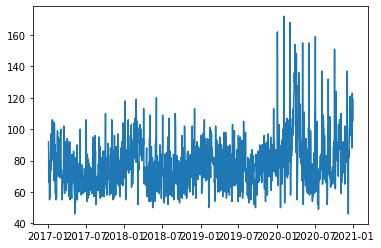

In [17]:
xs = df_grouped_by_date['date']    # X axis for plotting
ys = df_grouped_by_date['amount']  # Y axis for plotting

plt.plot(xs, ys)

<AxesSubplot:xlabel='month'>

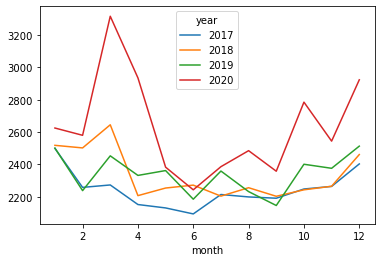

In [18]:
df_groupby_year = df.groupby(['year', 'month']).sum().reset_index()

df_groupby_year.pivot(index='month', columns='year', values='amount').plot()

In [19]:
plt.plot(g2["maand"], g2["amount"], label = g2["jaar"])
plt.legend(df["jaar"])

NameError: name 'g2' is not defined

In [ ]:
g2 = g2.pivot(index = "maand", columns = "jaar", values = "amount")
print(g2)

In [ ]:
g2.plot()

In [ ]:
g3 = df.groupby("city", as_index = False)["amount"].sum()
g3

In [ ]:
sns.catplot(kind = "bar", y = "city", x = "amount", data = g3)
plt.xticks(rotation=60)
plt.show()

In [ ]:
dftest = df["city"] == "Breda"
df2 = df[dftest]
df2
#monumenttrees = trees["STATUS"] == "Monumentaal"
#monument = trees[monumenttrees]

In [ ]:
g4 = df.groupby("wkday", as_index = False)["amount"].sum()

In [ ]:
sns.catplot(kind = "bar", y = "amount", x = "wkday", data = g4, ci = None)
plt.xticks(rotation=60)
plt.show()

In [ ]:
g5 = df.groupby(["date", "city"], as_index = False)["amount"].sum()
g5

In [ ]:
g5 = g5.pivot(index = "date", columns = "city", values = "amount").fillna(0)
print(g5)

In [ ]:
g5.plot(figsize = (20,15), subplots = True, sharey = True)


In [ ]:
dfbreda = df[df["city"] == "Breda"]
dfbreda = dfbreda.groupby(["maand", "jaar"], as_index = False)["amount"].sum().pivot(index = "maand", columns = "jaar", values = "amount").fillna(0)
dfbreda.plot()